In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
from matplotlib.patches import Patch

%matplotlib inline

In [58]:
# graph styles
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'figure.facecolor': 'white',
    'font.size': 12.0,
    'axes.facecolor': 'white',
    'axes.edgecolor': 'white',
    'axes.linewidth': '1',
    'axes.grid': True,
    'grid.color': '#b7b7b7',
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#64aad4', '#275876', '#ec866c', '#8bccc9', '#f9d669', '#EBA239']),
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'axes.labelweight': 'medium',
    'axes.spines.left': False,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.facecolor': '#FFFFFF',
    'font.family': 'Gulim',
})



In [2]:
df = pd.read_csv('data/january-june-2017.csv', skipinitialspace=True)

In [3]:
df.head()

,Check/Payment Date,Vendor ID Number,Document Nbr,Fund Center,Dept. Descrptn,Vendor Name,Commitmt Item Name,Invoice Net Amt
0,1/9/2017,3521555,1905025173,AR66000039,Office of Arts and Culture,"JOHNSON, GARTH W",Percent Arts-Prf Svc,400.00
1,1/27/2017,3072374,5200546429,8980150005,Human Services,1 N 10 INC,Spec Contractual Svc,"5,153.60"
2,1/27/2017,3072374,5200546429,8980150005,Human Services,1 N 10 INC,Spec Contractual Svc,"2,400.00"
3,1/27/2017,3072374,5200546432,8980150005,Human Services,1 N 10 INC,Spec Contractual Svc,"5,153.60"
4,1/27/2017,3072374,5200546432,8980150005,Human Services,1 N 10 INC,Spec Contractual Svc,"2,610.61"


In [4]:
df['Vendor Name'].value_counts()

WIST OFFICE PRODUCTS CO                20531
GRAINGER                               12190
ARIZONA UNIFORM & APPAREL               5413
WAXIE SANITARY SPLY                     5337
COURTESY CHEVROLET                      5152
MISSION UNIFORM SERVICES                4078
ARIZONA PUBLIC SERVICE CO               4020
BROWNS PARTSMASTER INC                  3764
ELECTRIC SUPPLY INC                     3629
SIX POINTS HARDWARE INC                 3352
COMMUNITY TIRE PROS & AUTO REPAIR       3209
VULCAN MATERIAL CO - WESTERN D          2624
MARIPOSA LANDSCAPE ARIZONA INC          2549
WESCO                                   2467
NATIONAL FIRE CONTROL                   2330
PRUDENTIAL OVERALL SUPPLY               2174
FREIGHTLINER OF ARIZONA LLC             1960
ENVIRONMENTAL RESPONSE INC              1947
INTERNATIONAL CORPORATE APPAREL INC     1937
WESTERN TOWING                          1790
AIRE FILTER PRODUCTS                    1732
STAR DISTRIBUTING CO                    1712
AGS SAFETY

In [4]:
df['Commitmt Item Name'].value_counts()

Inventories-Offline     23393
Office Supplies         19716
Inventories             13746
Motor Vehicle Repair    13055
Mat to Maint Infr/Eq    11678
Clothing                 8784
Machine/Equip Repair     6644
Small Tools/ Equip       6062
Electrical Supplies      5727
Plumbing Supplies        5316
Misc Maint/Repairs       5036
Janitorial Supplies      4408
Electricity              4276
HVAC Services            3981
Other Rentals            3876
Air Cond/Heating Eq      3848
Motor Vehicle Parts      3672
Safety/Envir Supply      3431
Chemicals                3400
Landscpe Maintenance     3297
Cons/Other Prof Svcs     2939
Library Materials        2917
Testing                  2883
Spec Contractual Svc     2782
Safety/Environ Costs     2779
Temp Employment Svcs     2764
Trust Liab and Dep       2747
Elev/Es/Mov Sw Maint     2702
Security Services        2536
Contractual Constrct     2522
                        ...  
Section 8 Prelim Fee        2
Green Organics              2
Prop Acq S

In [47]:
df.dtypes

Check/Payment Date    object
Vendor ID Number       int64
Document Nbr           int64
Fund Center           object
Dept. Descrptn        object
Vendor Name           object
Commitmt Item Name    object
Invoice Net Amt       object
dtype: object

In [5]:
df['Invoice Net Amt '] = df['Invoice Net Amt '].str.replace(',', '')
df['Invoice Net Amt '] = df['Invoice Net Amt '].str.replace('(', '-')
df['Invoice Net Amt '] = df['Invoice Net Amt '].str.replace(')', '')

In [23]:
df['Invoice Net Amt '] = df['Invoice Net Amt '].astype('float64')
df.dtypes

Check/Payment Date     object
Vendor ID Number        int64
Document Nbr            int64
Fund Center            object
Dept. Descrptn         object
Vendor Name            object
Commitmt Item Name     object
Invoice Net Amt       float64
dtype: object

In [7]:
df.head()

,Check/Payment Date,Vendor ID Number,Document Nbr,Fund Center,Dept. Descrptn,Vendor Name,Commitmt Item Name,Invoice Net Amt
0,1/9/2017,3521555,1905025173,AR66000039,Office of Arts and Culture,"JOHNSON, GARTH W",Percent Arts-Prf Svc,400.00
1,1/27/2017,3072374,5200546429,8980150005,Human Services,1 N 10 INC,Spec Contractual Svc,5153.60
2,1/27/2017,3072374,5200546429,8980150005,Human Services,1 N 10 INC,Spec Contractual Svc,2400.00
3,1/27/2017,3072374,5200546432,8980150005,Human Services,1 N 10 INC,Spec Contractual Svc,5153.60
4,1/27/2017,3072374,5200546432,8980150005,Human Services,1 N 10 INC,Spec Contractual Svc,2610.61


In [24]:
df.sort_values(by='Invoice Net Amt ', ascending=False)

,Check/Payment Date,Vendor ID Number,Document Nbr,Fund Center,Dept. Descrptn,Vendor Name,Commitmt Item Name,Invoice Net Amt
209743,6/19/2017,3011720,1905115811,DCTRN20130,Debt - CIC Lease Purchase,US BANK TRUST NATIONAL ASSOCIATION,Amt Prv-Lng-Trm Oblg,49865000.00
209532,6/19/2017,3011720,1905115745,DGASU00901,Debt - General Obligation Bonds,US BANK TRUST NATIONAL ASSOCIATION,Amt Prv-Lng-Trm Oblg,21685000.00
209625,6/19/2017,3011720,1905115769,DCSAN20080,Debt - CIC Lease Purchase,US BANK TRUST NATIONAL ASSOCIATION,Amt Prv-Lng-Trm Oblg,15140000.00
203880,5/25/2017,3067520,5200601994,6720100004,Public Transit,TRANSDEV SERVICE INC,Contract Trans Svcs,13991325.27
209631,6/19/2017,3011720,1905115777,DCAVN2010A,Debt - CIC Lease Purchase,US BANK TRUST NATIONAL ASSOCIATION,Amt Prv-Lng-Trm Oblg,13960000.00
209630,6/19/2017,3011720,1905115777,DCAVN2010A,Debt - CIC Lease Purchase,US BANK TRUST NATIONAL ASSOCIATION,Amt Prv-Lng-Trm Oblg,13917665.88
209726,6/19/2017,3011720,1905115803,DCWAT20110,Debt - CIC Lease Purchase,US BANK TRUST NATIONAL ASSOCIATION,Amt Prv-Lng-Trm Oblg,11215000.00
209550,6/19/2017,3011720,1905115745,DGNPS00901,Debt - General Obligation Bonds,US BANK TRUST NATIONAL ASSOCIATION,Amt Prv-Lng-Trm Oblg,10655000.00
209627,6/19/2017,3011720,1905115772,DCWAT2009A,Debt - CIC Lease Purchase,US BANK TRUST NATIONAL ASSOCIATION,Amt Prv-Lng-Trm Oblg,10415000.00
209748,6/19/2017,3011720,1905115814,DCWAT2014B,Debt - CIC Lease Purchase,US BANK TRUST NATIONAL ASSOCIATION,Amt Prv-Lng-Trm Oblg,10389025.00


In [9]:
# find out how many purchases Phoenix makes in each category
df['Dept. Descrptn'].value_counts()

Public Works                                72767
Water Services                              36711
Aviation                                    24181
Parks and Recreation                        20282
Police                                      15465
Fire                                        12748
Street Transportation                       12526
Housing                                      8057
Library                                      5956
Human Services                               5196
Municipal Court                              5193
Neighborhood Services                        5012
Phoenix Convention Center                    4565
Information Technology Services              3414
Trust                                        2954
Community and Economic Development           2472
Planning and Development                     2426
Public Transit                               2093
Finance                                      1547
City Clerk                                   1426


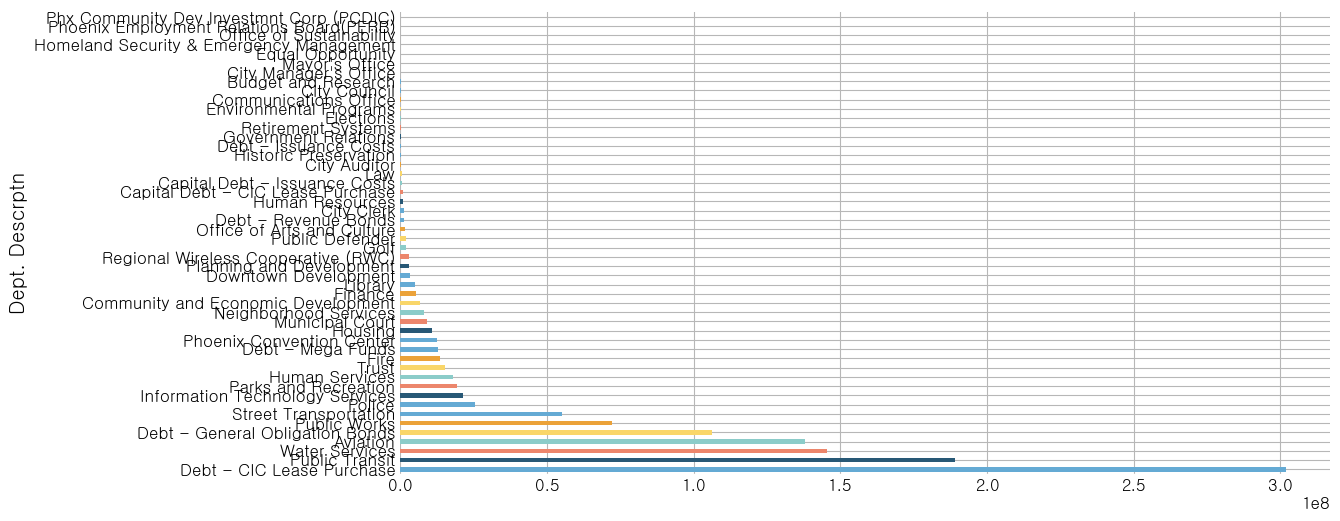

In [66]:
# find out how much Phoenex spends on each category of service
df.groupby(['Dept. Descrptn'])['Invoice Net Amt '].sum().sort_values(ascending=False).plot(kind='barh', figsize=(12,6))

plt.show()

In [14]:
# df[df['Dept. Descrptn']=='Golf']

,Check/Payment Date,Vendor ID Number,Document Nbr,Fund Center,Dept. Descrptn,Vendor Name,Commitmt Item Name,Invoice Net Amt
5835,6/20/2017,3028281,5200615409,7380000012,Golf,ADVANTAGE PURE FLO,Miscellaneous,53.50
5836,6/20/2017,3028281,5200615409,7380000012,Golf,ADVANTAGE PURE FLO,Mat to Maint Infr/Eq,216.10
5837,6/20/2017,3028281,5200615409,7380000012,Golf,ADVANTAGE PURE FLO,Mat to Maint Infr/Eq,-152.30
19180,1/27/2017,3012694,1905052303,7380000000,Golf,ARIZONA DEPARTMENT OF LIQUOR &,Miscellaneous,850.00
19426,3/30/2017,3021831,1905086009,7380000000,Golf,ARIZONA DEPT OF WATER RESOURCES,Raw Water Purchases,1979.17
21441,1/6/2017,3016645,1905048533,7380000004,Golf,ARIZONA PUBLIC SERVICE CO,Electricity,1241.13
21443,1/6/2017,3016645,1905048533,7380000004,Golf,ARIZONA PUBLIC SERVICE CO,Electricity,1899.69
21444,1/6/2017,3016645,1905048533,7380000004,Golf,ARIZONA PUBLIC SERVICE CO,Electricity,34.92
21450,1/6/2017,3016645,1905048533,7380000006,Golf,ARIZONA PUBLIC SERVICE CO,Electricity,35.99
21455,1/6/2017,3016645,1905048533,7380000004,Golf,ARIZONA PUBLIC SERVICE CO,Electricity,465.07


In [32]:
# Golf vendors, sorted by number of orders
df[df['Dept. Descrptn']=='Golf']['Vendor Name'].value_counts()

SCOTT BUSINESS GROUP LLC               75
GRAINGER                               70
ARIZONA PUBLIC SERVICE CO              68
PNC EQUIPMENT FINANCE LLC              59
E-Z-GO                                 59
WIST OFFICE PRODUCTS CO                51
DUNBAR ARMORED INC                     50
IMPREST ACCOUNT PARKS AGUILA GOLF      45
PRUDENTIAL OVERALL SUPPLY              36
IMPREST ACCOUNT GOLF DIV               26
OB SPORTS GOLF MANAGEMENT              25
CITY WIDE PEST CONTROL                 23
REPUBLIC SERVICES                      22
PHOENIX PUMPS INC                      19
DELL MARKETING LP                      18
SOUTHWEST GAS                          17
BROWNS PARTSMASTER INC                 16
BLACKSTONE SECURITY SERVICES INC       10
LP STEEL INDUSTRIES LLC                 9
SIX POINTS HARDWARE/ELEC                8
ERANGE INC                              7
JP MORGAN CHASE BANK NA                 7
NESTLE WATERS NORTH AMERICA             6
MY ALARM CENTER LLC               

In [21]:
df.dtypes

Check/Payment Date    object
Vendor ID Number       int64
Document Nbr           int64
Fund Center           object
Dept. Descrptn        object
Vendor Name           object
Commitmt Item Name    object
Invoice Net Amt       object
dtype: object

In [40]:
df[df['Vendor Name']=='NESTLE WATERS NORTH AMERICA']['Commitmt Item Name'].value_counts()

Other Rentals           218
Inventories              38
Other Commodities        37
Miscellaneous            11
Food                      4
Inventories-Offline       3
Disp Meal Srvc Spply      2
Courier/Delivery Svc      1
Name: Commitmt Item Name, dtype: int64

In [41]:
df[df['Vendor Name']=='SALT RIVER PROJECT']

,Check/Payment Date,Vendor ID Number,Document Nbr,Fund Center,Dept. Descrptn,Vendor Name,Commitmt Item Name,Invoice Net Amt
181408,1/3/2017,3016865,1905040334,5010000000,Municipal Court,SALT RIVER PROJECT,Trust Liab and Dep,45.60
181409,1/4/2017,3016864,1905039325,8601287100,Housing,SALT RIVER PROJECT,Electricity,23.03
181410,1/4/2017,3014032,1905040142,8980250100,Human Services,SALT RIVER PROJECT,Emergency Assistance,25650.00
181411,1/4/2017,3014032,1905040256,8980250100,Human Services,SALT RIVER PROJECT,Emergency Assistance,26218.84
181412,1/4/2017,3016864,1905040322,8601287100,Housing,SALT RIVER PROJECT,Electricity,28.23
181413,1/4/2017,3016864,1905048145,8601287100,Housing,SALT RIVER PROJECT,Electricity,26.43
181414,1/4/2017,3016864,1905048147,8601287100,Housing,SALT RIVER PROJECT,Electricity,21.80
181415,1/4/2017,3016864,1905048148,8601287100,Housing,SALT RIVER PROJECT,Electricity,28.00
181416,1/4/2017,3016864,1905048149,8601287100,Housing,SALT RIVER PROJECT,Electricity,11.32
181417,1/4/2017,3016864,1905048150,8601287100,Housing,SALT RIVER PROJECT,Electricity,22.77


In [42]:
df[df['Dept. Descrptn']=='Public Defender']['Vendor Name'].value_counts()

WIST OFFICE PRODUCTS CO                79
AVTRANZ                                16
BARRY W KIMMONS                        15
FAUSSETTE & FAUSSETTE, PLLC            15
VISION BUSINESS PRODUCTS OF ARIZONA    13
RADOVANOV, JELENA                      13
D MICHAEL & ASSOCIATES INC             11
MCNULTY, CHARLES M                     11
SILVAS MANUEL S                        11
SANCHEZ, ANA MARIBET                    8
CALLENDER, RANDALL                      8
BURNS NICKERSON AND TAYLOR PLC          7
WICKS, MICHAEL JAMES                    7
ADELAYO LAW FIRM, PLLC                  7
THE LAW OFFICE OF DAVID J TEEL PLLC     7
SILVA, SCOTT C                          7
GREER, NORA F                           7
CAHILL, SUSAN A                         7
COLLINS, COURTNEY                       7
BAIN, AMY                               7
BRAATEN, DIANA L                        7
CAREY, KATHLEEN N.                      7
IACOB, ANCA D                           7
CREWS, TED J                      

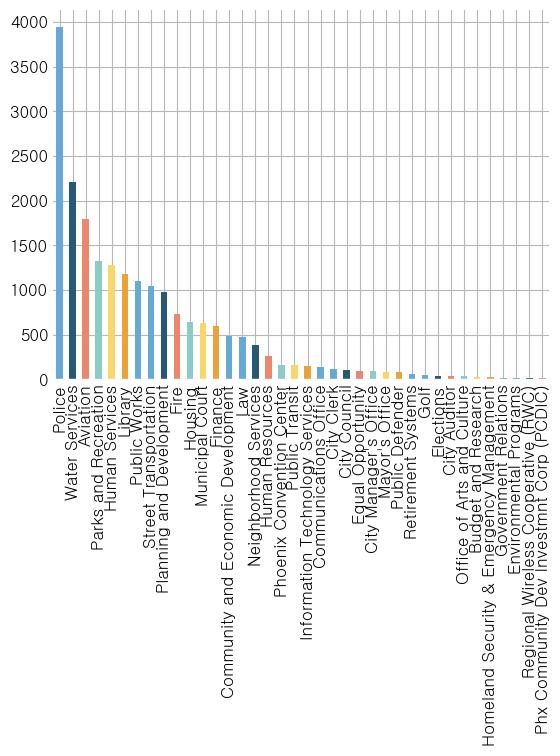

In [68]:
# number of orders places by department
# this would be better broken down by department size
df[df['Vendor Name']=='WIST OFFICE PRODUCTS CO']['Dept. Descrptn'].value_counts().plot(kind='bar')

plt.show()

In [77]:
mayor = df[df['Dept. Descrptn']=="Mayor's Office"]
mayor.head()

,Check/Payment Date,Vendor ID Number,Document Nbr,Fund Center,Dept. Descrptn,Vendor Name,Commitmt Item Name,Invoice Net Amt
12591,1/31/2017,3060028,5200550570,1000000000,Mayor's Office,ALLSTAFF SERVICES INC,Temp Employment Svcs,780.0
12592,1/31/2017,3060028,5200550579,1000000000,Mayor's Office,ALLSTAFF SERVICES INC,Temp Employment Svcs,624.0
12593,1/31/2017,3060028,5200550579,1000000000,Mayor's Office,ALLSTAFF SERVICES INC,Temp Employment Svcs,468.0
12618,2/3/2017,3060028,5200552117,1000000000,Mayor's Office,ALLSTAFF SERVICES INC,Temp Employment Svcs,780.0
12635,2/16/2017,3060028,5200557673,1000000000,Mayor's Office,ALLSTAFF SERVICES INC,Temp Employment Svcs,702.0


In [49]:
df[df['Vendor Name']=='ALLSTAFF SERVICES INC']['Dept. Descrptn'].value_counts()

Public Works                 159
Phoenix Convention Center    110
City Council                  82
Fire                          57
City Clerk                    50
Mayor's Office                31
Planning and Development      29
Street Transportation         25
Parks and Recreation          23
Public Transit                19
City Manager's Office          7
Name: Dept. Descrptn, dtype: int64

In [51]:
# fire department info
fire = df[df['Dept. Descrptn']=='Fire']
fire

,Check/Payment Date,Vendor ID Number,Document Nbr,Fund Center,Dept. Descrptn,Vendor Name,Commitmt Item Name,Invoice Net Amt
15,1/25/2017,3065624,5200545021,5760100000,Fire,1 STOP ELECTRONICS CENTER INC,Inventories,4756.23
16,1/27/2017,3065624,5200542256,5760100000,Fire,1 STOP ELECTRONICS CENTER INC,Inventories,5170.57
19,1/27/2017,3065624,5200545012,5760100000,Fire,1 STOP ELECTRONICS CENTER INC,Inventories,4013.88
20,2/21/2017,3065624,5200550843,5760100000,Fire,1 STOP ELECTRONICS CENTER INC,Inventories,4756.23
21,2/21/2017,3065624,5200550845,5760100000,Fire,1 STOP ELECTRONICS CENTER INC,Inventories,5248.25
22,2/21/2017,3065624,5200550847,5760100000,Fire,1 STOP ELECTRONICS CENTER INC,Other Commodities,949.52
26,2/22/2017,3065624,5200555674,5760100000,Fire,1 STOP ELECTRONICS CENTER INC,Inventories,1381.12
28,4/4/2017,3065624,5200579182,5760100000,Fire,1 STOP ELECTRONICS CENTER INC,Inventories,4013.88
29,4/4/2017,3065624,5200579185,5760100000,Fire,1 STOP ELECTRONICS CENTER INC,Inventories,4756.23
33,6/19/2017,3065624,5200614944,5760100000,Fire,1 STOP ELECTRONICS CENTER INC,Inventories,4013.88


In [69]:
fire[fire['Vendor Name']=='ALLSTAFF SERVICES INC']['Commitmt Item Name'].value_counts()

Temp Employment Svcs    56
Spec Contractual Svc     1
Name: Commitmt Item Name, dtype: int64

In [78]:
mayor[mayor['Vendor Name']=='ALLSTAFF SERVICES INC']['Commitmt Item Name'].value_counts()

Temp Employment Svcs    31
Name: Commitmt Item Name, dtype: int64

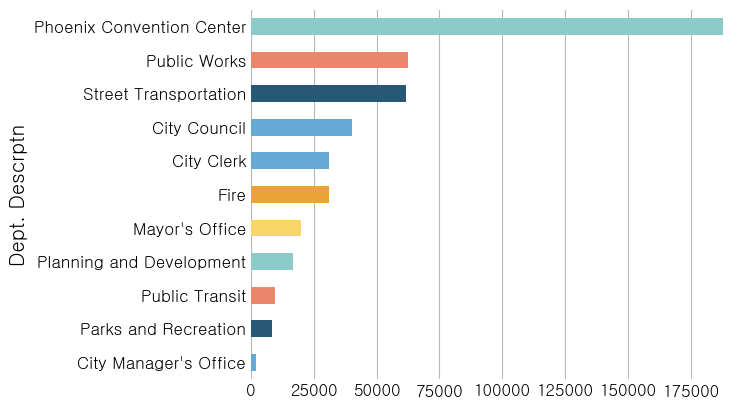

In [76]:
# all Allstaff Services invoices
temp_work = df[df['Vendor Name']=='ALLSTAFF SERVICES INC']

ax = temp_work.groupby('Dept. Descrptn')['Invoice Net Amt '].sum().sort_values(ascending=True).plot(kind='barh')
ax.grid(False, axis='y')

plt.show()

In [81]:
mayor['Vendor Name'].value_counts()

WIST OFFICE PRODUCTS CO             82
ALLSTAFF SERVICES INC               31
HP INC                              12
FOUR SEASONS TRAVEL INC             12
VERIFIED VOLUNTEERS                  7
GENTRY KATHERINE                     3
UNITED STATES CONFERENCE             2
MOUNTAIN STATES SPECIALTIES INC      2
MOLERA ALVAREZ LLC                   1
GREATER PHOENIX ECONOMIC COUNCIL     1
GENTRY, KATHERINE                    1
ARIZONA REPUBLIC UNIT 1531           1
ROTARY CLUB OF PHX                   1
PHOENIX PRIDE INC                    1
Name: Vendor Name, dtype: int64

In [97]:
mayor[mayor['Vendor Name']=='PHOENIX PRIDE INC']

,Check/Payment Date,Vendor ID Number,Document Nbr,Fund Center,Dept. Descrptn,Vendor Name,Commitmt Item Name,Invoice Net Amt
160569,6/30/2017,3053502,5200624557,1000000000,Mayor's Office,PHOENIX PRIDE INC,Marketing Services,130.0


In [98]:
fire['Vendor Name'].value_counts()

WIST OFFICE PRODUCTS CO                732
BOUND TREE MEDICAL LLC                 726
ABOVE ALL PLUMBING SERVICES INC        712
MATHESON TRI-GAS INC                   636
GRAINGER                               599
PRUDENTIAL OVERALL SUPPLY              597
MINER SOUTHWEST LLC                    565
HENRY SCHEIN INC                       552
MARIPOSA LANDSCAPE ARIZONA INC         411
INTERNATIONAL CORPORATE APPAREL INC    407
AKERS PEST CONTROL                     330
PHOENIX FENCE CO                       314
MUNICIPAL EMERGENCY SERVICES           307
BYASSEE EQUIPMENT INC                  301
UNIFORMS MANUFACTURING INC             292
UNITED FIRE EQUIP CO                   222
WAXIE SANITARY SPLY                    212
SIX POINTS HARDWARE INC                190
SONORA QUEST LABORATORIES LLC          153
DESERT CUTTING TOOLS INC               118
INDUSTRIAL METAL SUPPLY CO INC         116
VISION BUSINESS PRODUCTS OF ARIZONA    108
REDDY ICE CORPORATION                   97
LN CURTIS &

In [102]:
# 6 month of odor control services
fire[fire['Vendor Name']=='ARIZONA AIR SCENT']['Invoice Net Amt '].sum()

3642.17

In [107]:
fire[fire['Vendor Name']=='WIST OFFICE PRODUCTS CO']['Invoice Net Amt '].sum()

59161.23

In [106]:
fire[fire['Vendor Name']=='VISION BUSINESS PRODUCTS OF ARIZONA']['Invoice Net Amt '].sum()

28860.239999999998

In [110]:
# 6 months of ice
fire[fire['Vendor Name']=='REDDY ICE CORPORATION']['Invoice Net Amt '].sum()

11846.6